<a href="https://colab.research.google.com/github/blessjal/practicums/blob/master/hwk2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

In [ ]:
auto = pd.read_csv('/content/sample_data/auto-mpg.csv', sep=',')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
auto.shape

(398, 9)

**1(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median and a 0 if mpg contains a value below its medi**an

In [ ]:
mpg_med = auto.mpg.median()
auto['mpg01'] = np.where(auto.mpg > mpg_med, 1, 0)

In [ ]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


**1(b) Explore the data graphically in orderto investigate the association between mpg01 and the other features using scatterplots and boxplots. Describe your findings.**

In [ ]:
auto.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,mpg01
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450,0.837419
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543,-0.736711
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409,-0.736608
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024,-0.745046
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873,0.316618
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662,0.448150
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000,0.512200
mpg01,0.837419,-0.736711,-0.736608,-0.745046,0.316618,0.448150,0.512200,1.000000


In [ ]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
mpg01             int64
dtype: object

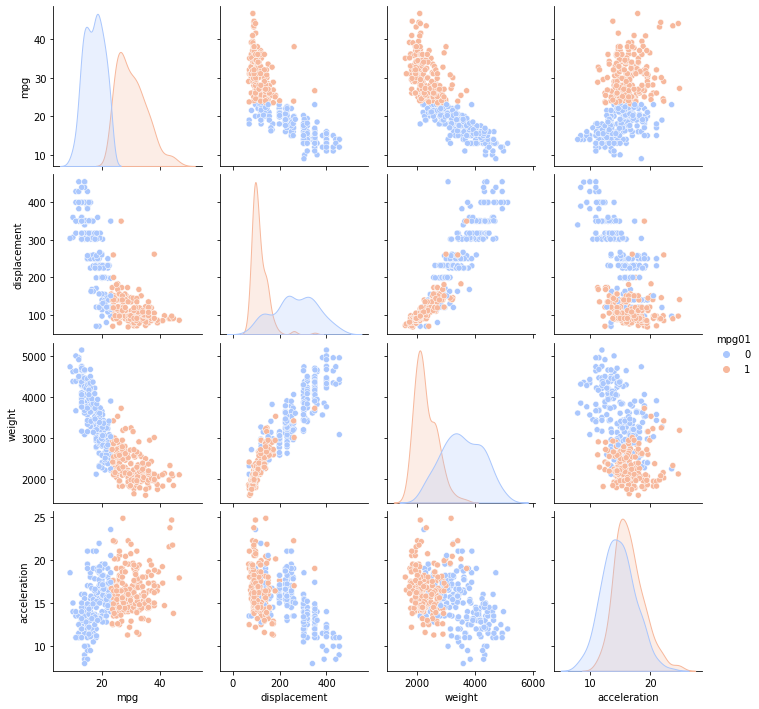

In [ ]:
sns.pairplot(auto, vars=['mpg', 'displacement', 'weight', 'acceleration'], hue='mpg01', palette='coolwarm')

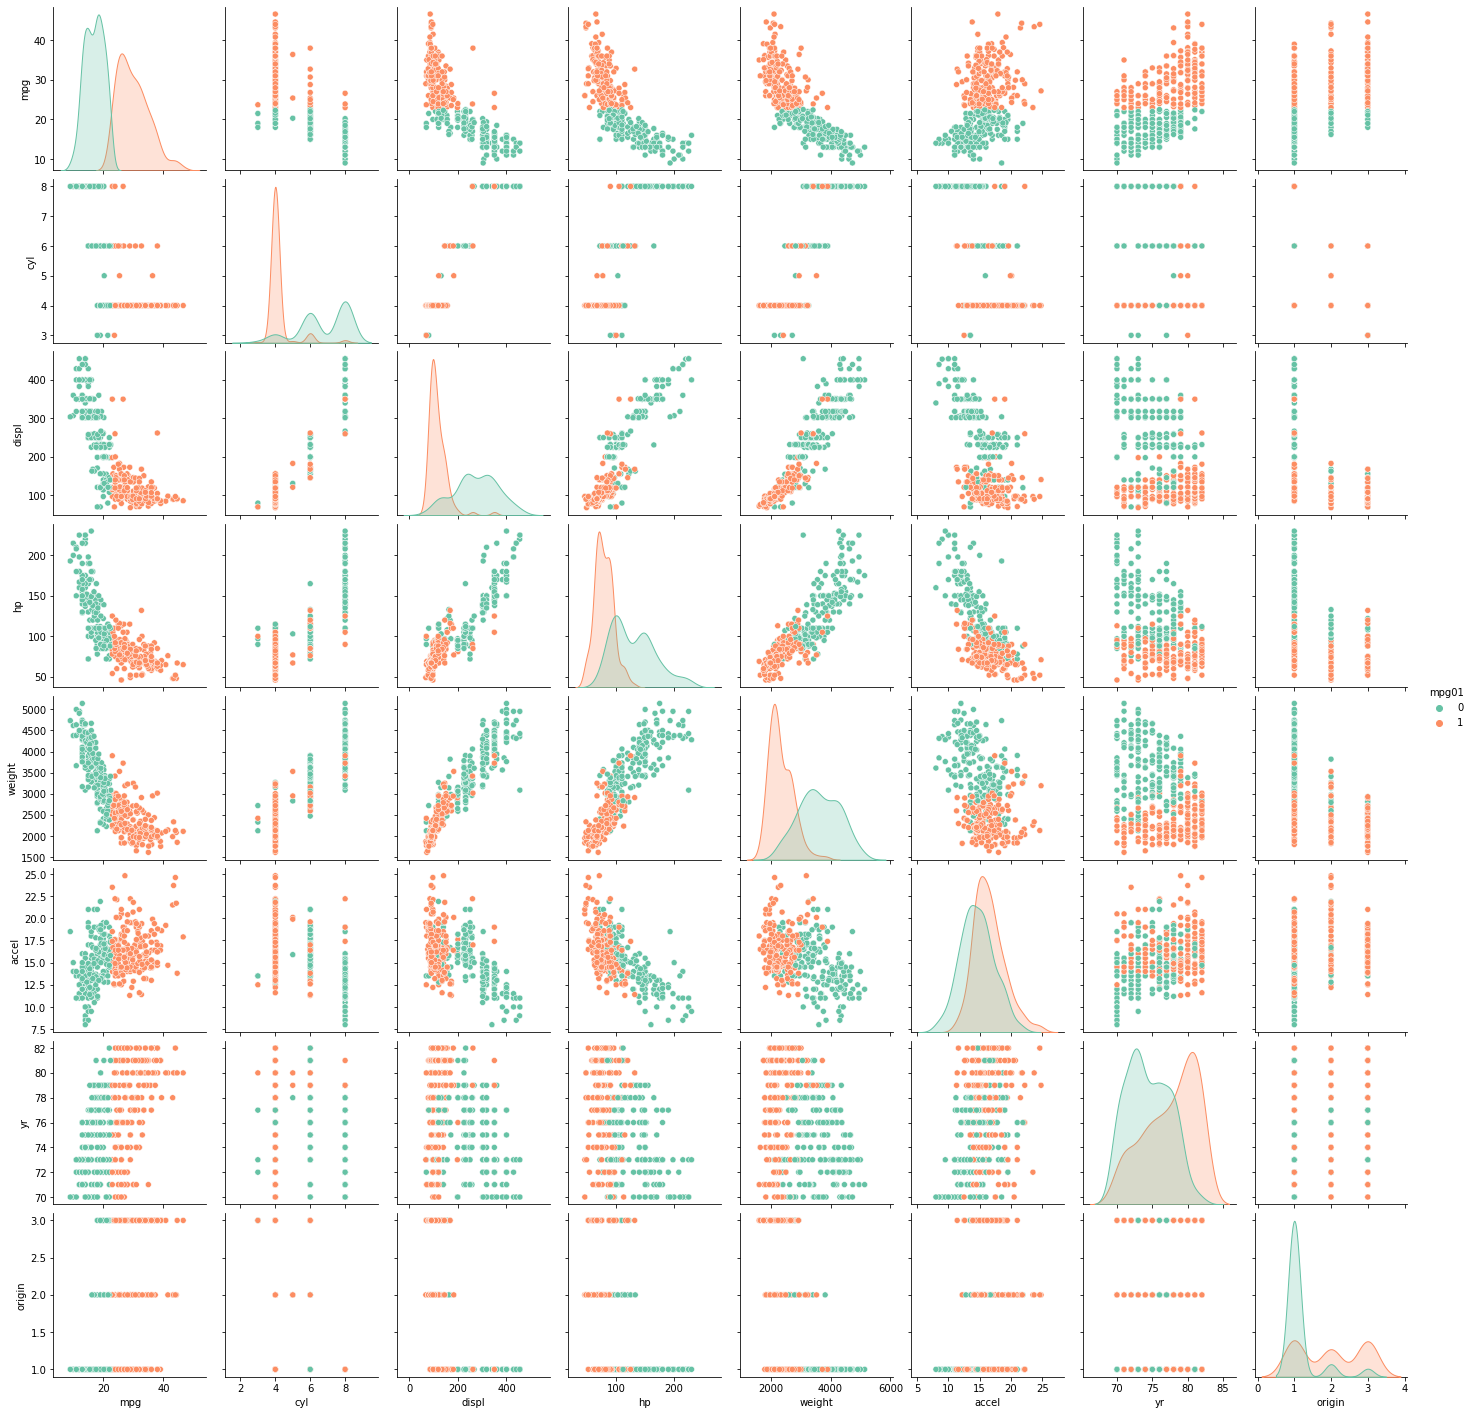

In [ ]:
sns.pairplot(auto, kind="scatter", hue="mpg01", palette="Set2")
plt.show()


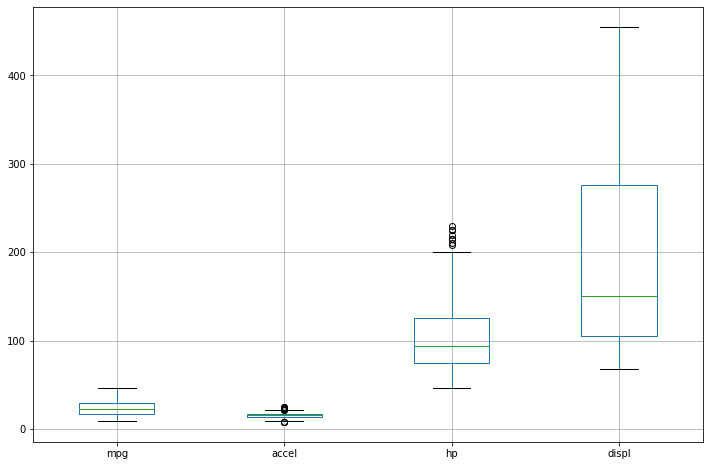

In [ ]:
auto.boxplot(column=['mpg', 'accel', 'hp', 'displ'], figsize=(12, 8))


**Data Preprocessing**

In [ ]:
 auto['horsepower'] = auto[auto['horsepower'] != '?']

In [ ]:
auto.horsepower.astype('int')

0      18
1      15
2      18
3      16
4      17
       ..
393    27
394    44
395    32
396    28
397    31
Name: horsepower, Length: 398, dtype: int64

**1(c) Split the dat into a training set and test set**

In [ ]:
X = auto.drop(['mpg01', 'car name', 'origin'], axis=1)
y = auto['mpg01']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(318, 7)
(80, 7)
(318,)
(80,)


**Transform data using StandardScalar()**

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**1(d) Perform a logistic regression on the training data in order to predict mpg01 using variables that seemed most associated with mpg01. Calculate the test error.**

In [ ]:
lr = LogisticRegression()
lr_fit = lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
y_test

65     0
132    1
74     0
78     0
37     0
      ..
269    1
235    1
145    1
196    1
124    0
Name: mpg01, Length: 80, dtype: int64

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('The accuracy of the logistic regression model is: ', accuracy)

The accuracy of the logistic regression model is:  0.9625


In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

0.0375

In [ ]:
error = np.sqrt(mse)

print('The error of the logistic regression model is:', error)

The error of the logistic regression model is: 0.19364916731037085


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[40,  3],
       [ 0, 37]])

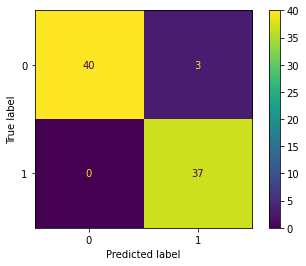

In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report

plot_confusion_matrix(lr_fit, X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.93      1.00      0.96        37

    accuracy                           0.96        80
   macro avg       0.96      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



**1(e) Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. Report the cross-validation error associated with differnt values of this parameter.**

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
import random

# C=1
svm_model = SVC(C=1)
svm_model_fit = svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print('The accuracy of the svm model (C=1) is ', svm_accuracy)

The accuracy of the svm model (C=1) is  0.9625


In [ ]:
# C=5
svm_model = SVC(C=5)
svm_model_fit = svm_model.fit(X_train, y_train)
svm_pred = svm_model_fit.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print('The accuracy of the svm model(C=5) is ', svm_accuracy)

The accuracy of the svm model(C=5) is  0.975


In [ ]:
# C=10
svm_model = SVC(C=10)
svm_model_fit = svm_model.fit(X_train, y_train)
svm_pred = svm_model_fit.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print('The accuracy of the svm model(C=10) is ', svm_accuracy)

The accuracy of the svm model(C=10) is  0.9625


In [ ]:
# C=15
svm_model = SVC(C=15)
svm_model_fit = svm_model.fit(X_train, y_train)
svm_pred = svm_model_fit.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print('The accuracy of the svm model(C=15) is ', svm_accuracy)

The accuracy of the svm model(C=15) is  0.9625


In [ ]:
from sklearn.model_selection import cross_val_score

cv_accuracy = cross_val_score(estimator=svm_model, X=X_train, y=y_train, cv=5)

cv_accuracy

array([0.984375  , 0.953125  , 1.        , 0.98412698, 1.        ])

In [ ]:
print('The mean accuracy of the cross_validation is', cv_accuracy.mean())

The mean accuracy of the cross_validation is 0.9843253968253969


**1(f) Repeat the previous item but this time using SVMs with radial and polynomial basis kernels with different values of** *gamma*, *degree* and *costs*. 

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 'C': [1, 5, 10, 15]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
gd_sr = GridSearchCV(estimator=svc, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)

clf.cv_results_

{'mean_fit_time': array([0.00160437, 0.00137005, 0.00123558, 0.00150051, 0.00109248,
        0.00121284, 0.00116191, 0.00133214, 0.00109248, 0.00123539,
        0.00109935, 0.0012641 , 0.00123863, 0.00124373, 0.00120139,
        0.00129819]),
 'mean_score_time': array([0.00061421, 0.00050735, 0.00047293, 0.00053005, 0.00043211,
        0.00045495, 0.0004457 , 0.00047622, 0.00039496, 0.00045972,
        0.00042291, 0.00045695, 0.00038357, 0.00043077, 0.00046268,
        0.00043521]),
 'mean_test_score': array([0.990625  , 0.97802579, 0.93402778, 0.9874504 , 0.990625  ,
        0.98427579, 0.94662698, 0.984375  , 0.9875    , 0.9843254 ,
        0.94975198, 0.98125   , 0.990625  , 0.9843254 , 0.95600198,
        0.978125  ]),
 'param_C': masked_array(data=[1, 1, 1, 1, 5, 5, 5, 5, 10, 10, 10, 10, 15, 15, 15, 15],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False],
        fill_value='?',
  

**2. Using the *College* data set, provide a solution for the following questions**

(a) Split the data into a training set and a test set

In [ ]:
df = pd.read_csv('/content/sample_data/College.txt')

df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
df.shape

(777, 19)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [ ]:
df.dtypes

Unnamed: 0      object
Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [ ]:
df.set_index('Unnamed: 0', inplace=True)
df.index.names = ['Name']

In [ ]:
df['Private'] = np.where(df.Private == 'Yes', 1, 0)
df['Private'].value_counts()

1    565
0    212
Name: Private, dtype: int64

In [ ]:



X = df[['Apps', 'Enroll', 'Top10perc',  'Top25perc', 'P.Undergrad', 'Outstate', 'PhD', 'perc.alumni', 'Expend']]
y = df['Accept']

sc = StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(np.array(y).reshape(-1, 1))



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(543, 9)
(234, 9)
(543, 1)
(234, 1)


**2(b) Fit a linear model using least squares on the training set and report the test error obtained.**

In [ ]:
lrMod = LinearRegression()
lrMod_fit = lrMod.fit(X_train, y_train)
lrMod_pred = lrMod.predict(X_test)
lrMod_pred[:10]

array([[-0.71399185],
       [-0.23514507],
       [-0.34315569],
       [-0.8146987 ],
       [-0.2444292 ],
       [ 1.85711449],
       [-0.42110187],
       [-0.66853926],
       [-0.15306258],
       [ 0.27551038]])

In [ ]:
mse = mean_squared_error(y_test, lrMod_pred)
lr_error = np.sqrt(mse)
print('The error of the logistic regression model is ', lr_error)

The error of the logistic regression model is  0.22143974522427678


In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X_train)
y = y_train
mod = sm.OLS(y, X)
results = mod.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1141.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        04:24:08   Log-Likelihood:                 52.400
No. Observations:                 543   AIC:                            -84.80
Df Residuals:                     533   BIC:                            -41.83
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.010     -0.075      0.9

In [ ]:
print('The Parameters of the OLS model: ', results.params)
print()
print('-'*100)
print('The Standard Errors of the OLS model: ', results.bse)
print()
print('-'*100)
print('The R^2 of the OLS model: ', results.rsquared)
print()
print('-'*100)
print('First 10 Predicted values: ', results.predict()[:10])

The Parameters of the OLS model:  [-0.00071191  0.59514782  0.44289894 -0.21537134  0.08916046 -0.02961361
  0.12230093  0.03290215 -0.03799572 -0.0418445 ]

----------------------------------------------------------------------------------------------------
The Standard Errors of the OLS model:  [0.00955049 0.02510529 0.02240399 0.02444016 0.02169074 0.01044287
 0.01558144 0.012324   0.01257281 0.01628842]

----------------------------------------------------------------------------------------------------
The R^2 of the OLS model:  0.9506501868806039

----------------------------------------------------------------------------------------------------
First 10 Predicted values:  [-0.57139007 -0.24845944  1.80868881 -0.50374117 -0.1907653  -0.61004236
  0.06103734 -0.57155991 -0.63180346 -0.72979019]


**2(c) Fit a ridge regression model on the training set, with lambda chosen by cross-validation. Report the test error obtained.**

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import RepeatedKFold

# define the cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the model
model = RidgeCV(alphas=np.arange(0, 1, 0.1), cv=cv, scoring='neg_mean_absolute_error')

# fit the model
modFit = model.fit(X_train, y_train)

# display the lambda that produced the lowest test MSE
print('The lambda that produced the least MSE is ', model.alpha_)

# error
mod_mse = mean_squared_error(y_test, modFit.predict(X_test))
modError = np.sqrt(mod_mse)
print('The error of the model is ', modError)

The lambda that produced the least MSE is  0.9
The error of the model is  0.2220079400524131


**2(d) Fit a lasso model on the training set, with lambda chosen by corss-validation. Report the test error obtained along wit hthe number of non-zero coefficients.** 

In [ ]:
from sklearn.linear_model import LassoCV

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
model = LassoCV(alphas=np.arange(0.01, 1, 0.01), cv=cv, n_jobs=-1)

#fit model
model_fit = model.fit(X_train, y_train)

# display the lambda that produced the lowest test MSE
print('The lambda that produced the least MSE is ', model.alpha_)
print()
print('-'*100)
print()
# error
model_mse = mean_squared_error(y_test, model_fit.predict(X_test))
modelError = np.sqrt(mod_mse)
print('The error of the model is ', modelError)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The lambda that produced the least MSE is  0.01

----------------------------------------------------------------------------------------------------

The error of the model is  0.2220079400524131


In [ ]:
non_zero_coefficients = np.sum(model.coef_ !=0)
print('The number of non-zero coefficients of the model is', non_zero_coefficients)

The number of non-zero coefficients of the model is 9
